**Directing Customers to Subscription Through App Behavior Analysis**

This notebook wants to build a model to predict if a certain client will subscribe or not a premium version of a mobile application.


**Problem Description**

Nowadays, many e-companies have application services, some companies offer completely free application and others have a premium version, it means, a paid version. For this case, we have a company who wants to know which clients will enroll to the premium version (in the trial version the services are limited). To build this model, we consider the customer behavior based on the utilization of a free version. It’s important to know that to each customer, the company offers 24 hours to try the premium version. The goal to build this model is to improve the marketing analysis. Once the company knows which clients will probably to enroll, it can direct your efforts to capture these customers. In this manner, the company can reduce the marketing spend and optimize the number of enrolled users.

**Dataset Description**

The dataset is built based on the app usage. The company stores the historical activities of each customer. The features for this dataset are

+ User (identifier number)
+ First Open (day and hour, M/D and AM/PM)
+ Day of Week (0 to 6, Sunday to Saturday)
+ Hour (0 to 23)
+ Age
+ Screen List (the list of application services accessed by a client in 24 hours)
+ Number of screens (total number of services accessed by a client in 24 hours)
+ Mini game (0 or 1, this is a game offered by the application)
+ Liked (0 or 1, if a customer liked any service of the application in 24 hours)
+ Used Premium Features (0 or 1, if a client used the trial premium version)
+ Enrolled (target variable, 0 or 1)
+ Enrolled date (date and hour, M/D and AM/PM).

So, we have 12 features (columns) and 50000 instances (that represent each customer). Beyond this preliminaries information, we also have a dataset that contains the most accessed screens in 24 hours, this will be important in the feature engineering process.

# Importing Libraries

In [1]:
import pandas as pd
from dateutil import parser # to take care about time and date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Importing Dataset

In [2]:
dataset = pd.read_csv('appdata10.csv')

# Data Preprocessing

## Visualizing some informations from the dataset

In [3]:
dataset.shape

(50000, 12)

In [4]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [5]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


### Taking cara about the hour variable

As we can see the values in the Hour column is an object type, we must to change into a numerical integer variable.

In [7]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [8]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis (EDA)

## Analyzing categorical variables

### Target Variable

In [9]:
dataset['enrolled'].value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

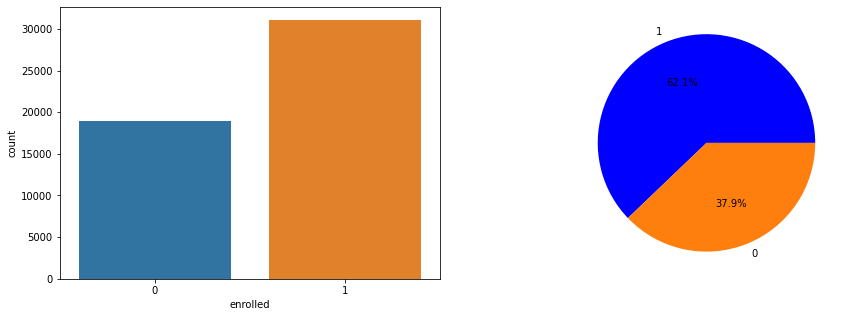

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=dataset['enrolled'])
plt.subplot(1, 2, 2)
values = dataset.iloc[:, - 3].value_counts(normalize = True).values # to show the binirie values in parcentage
index = dataset.iloc[:, -3].value_counts(normalize = True).index
plt.pie(values, labels= index, autopct='%1.1f%%', colors=['b', 'tab:orange'])
plt.show()

### Categorical Features

The categorical features are mini game, used premium feature and liked. We are going to see the pier plot distribution and the count plot according with the target variable.

In [11]:
categorical_list = ['minigame','used_premium_feature', 'liked', 'enrolled']

In [12]:
data_cat = dataset[categorical_list]

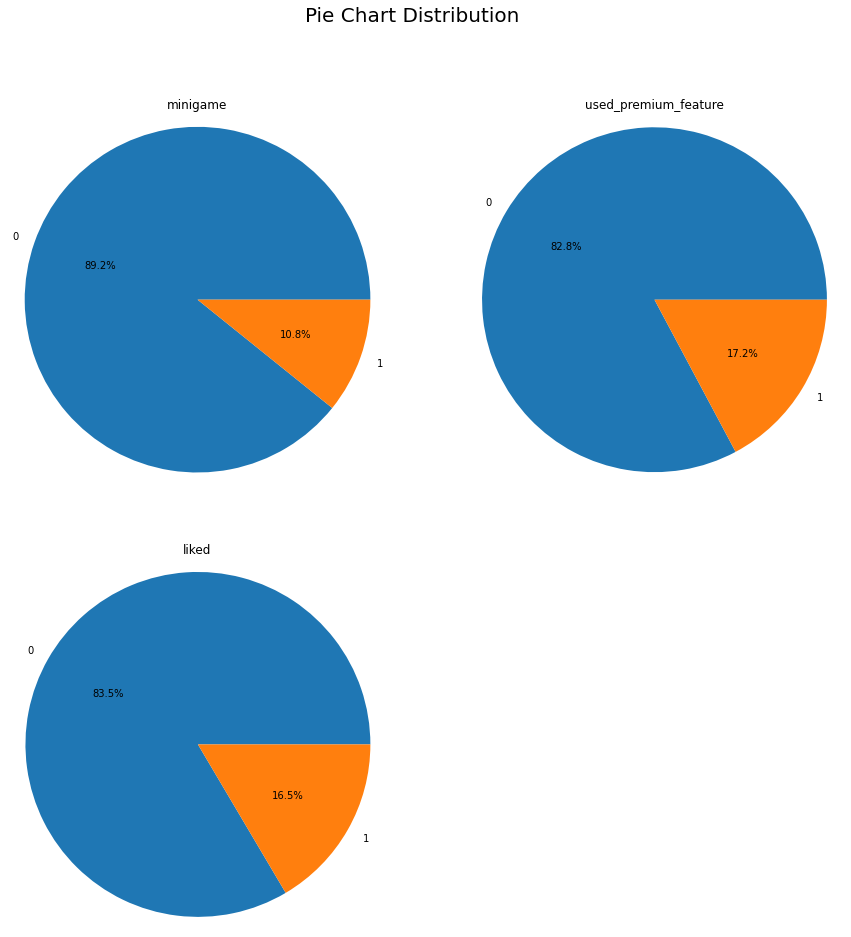

In [13]:
fig = plt.figure(figsize=(15, 15))
plt.suptitle('Pie Chart Distribution', fontsize = 20)
for i in range(1, data_cat.shape[1]):
    plt.subplot(2, 2, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data_cat.columns.values[i - 1])
  # Setting the biniries values
    values = data_cat.iloc[:, i - 1].value_counts(normalize = True).values # to show the binirie values in parcentage
    index = data_cat.iloc[:, i -1].value_counts(normalize = True).index
    plt.pie(values, labels= index, autopct='%1.1f%%')
    plt.axis('equal')
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

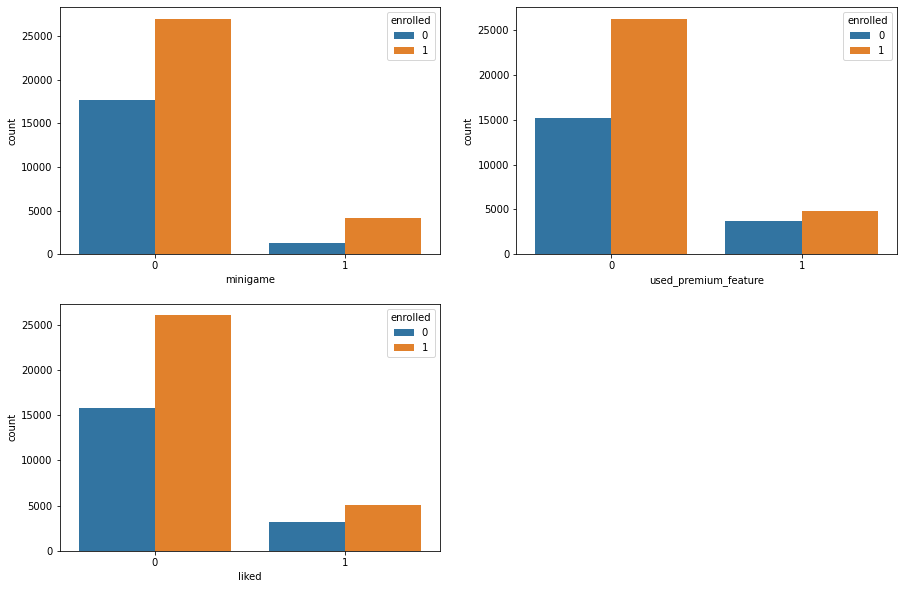

In [14]:
plt.figure(figsize=(15, 10))
for i in range(1, data_cat.shape[1]):
    plt.subplot(2, 2, i)
    sns.countplot(x=data_cat.iloc[: , i-1], hue=data_cat['enrolled'])
plt.show()

## Analyzing numerical variables

In [15]:
numerical_list = ['dayofweek', 'age', 'numscreens', 'enrolled']

In [16]:
data_num  = dataset[numerical_list]

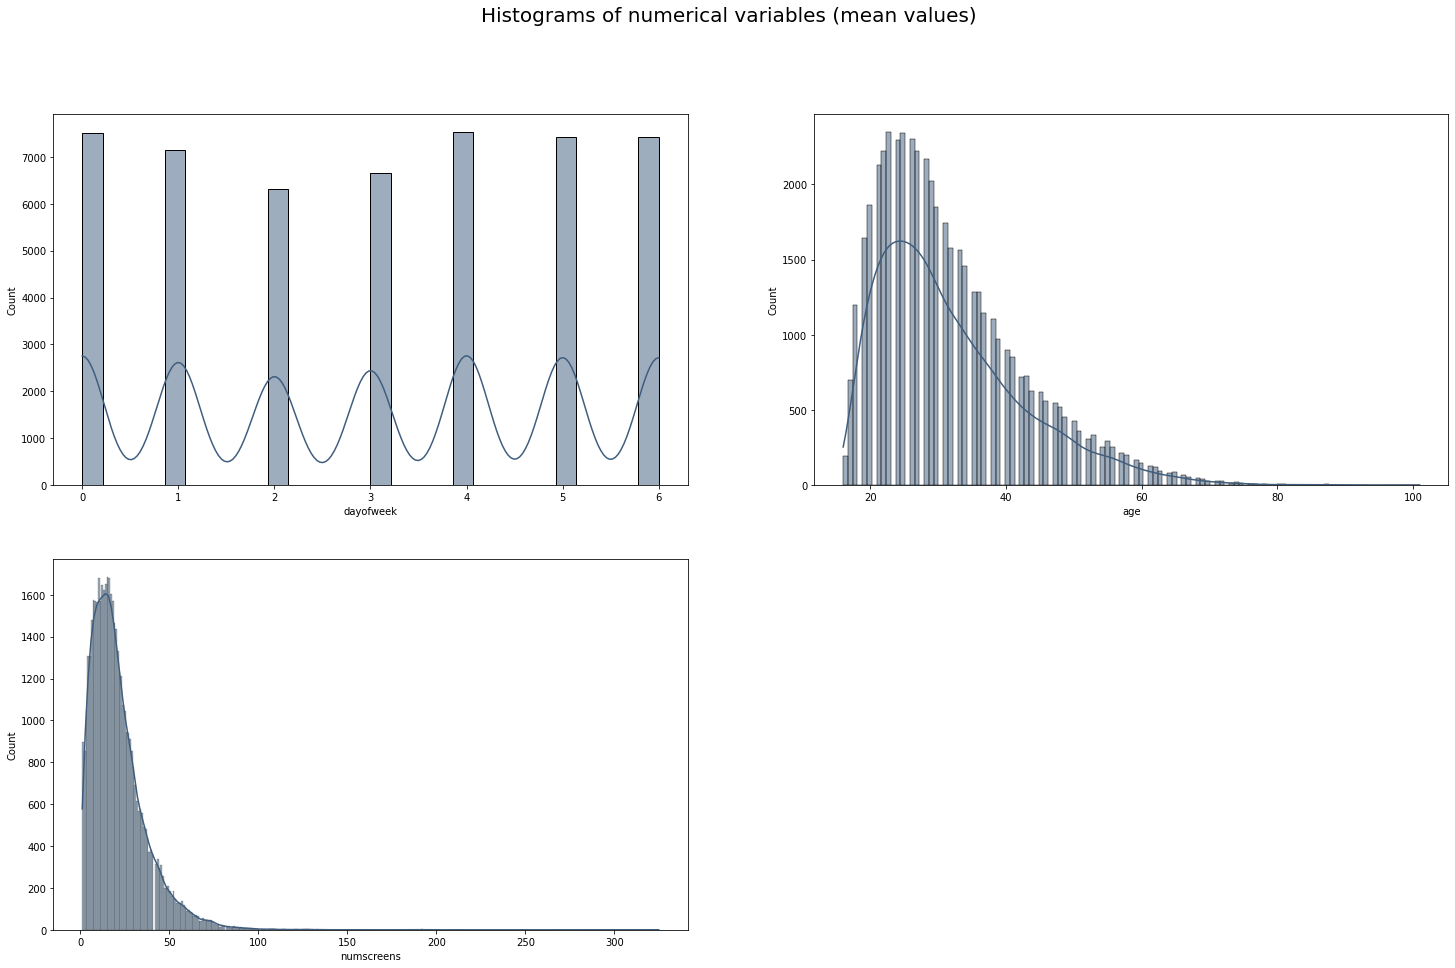

In [17]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables (mean values)', fontsize = 20)
for i in range(1, data_num.shape[1]):
    plt.subplot(2, 2, i)
    f = plt.gca()
    sns.histplot(data_num.iloc[:, i-1], color = '#3F5D7D', kde= True)
plt.show()

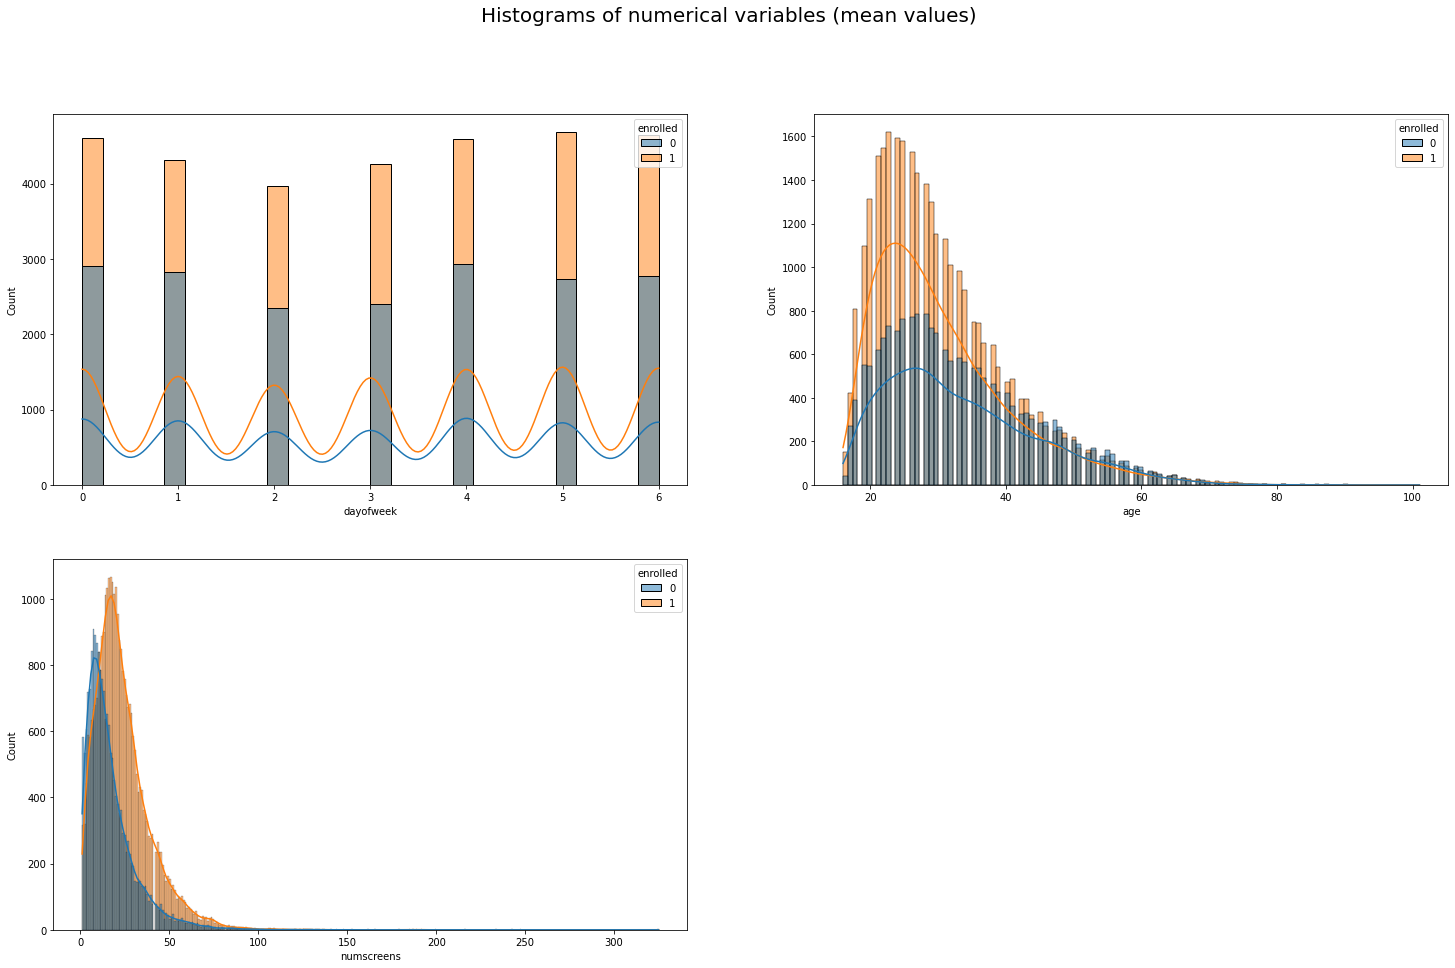

In [18]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables (mean values)', fontsize = 20)
for i in range(1, data_num.shape[1]):
    plt.subplot(2, 2, i)
    f = plt.gca()
    sns.histplot(data=data_num, x=data_num.iloc[:, i-1], hue='enrolled', kde = True)
plt.show()

## Correlation between the target and independent variables

<AxesSubplot:title={'center':'Correlation with reponse variable'}>

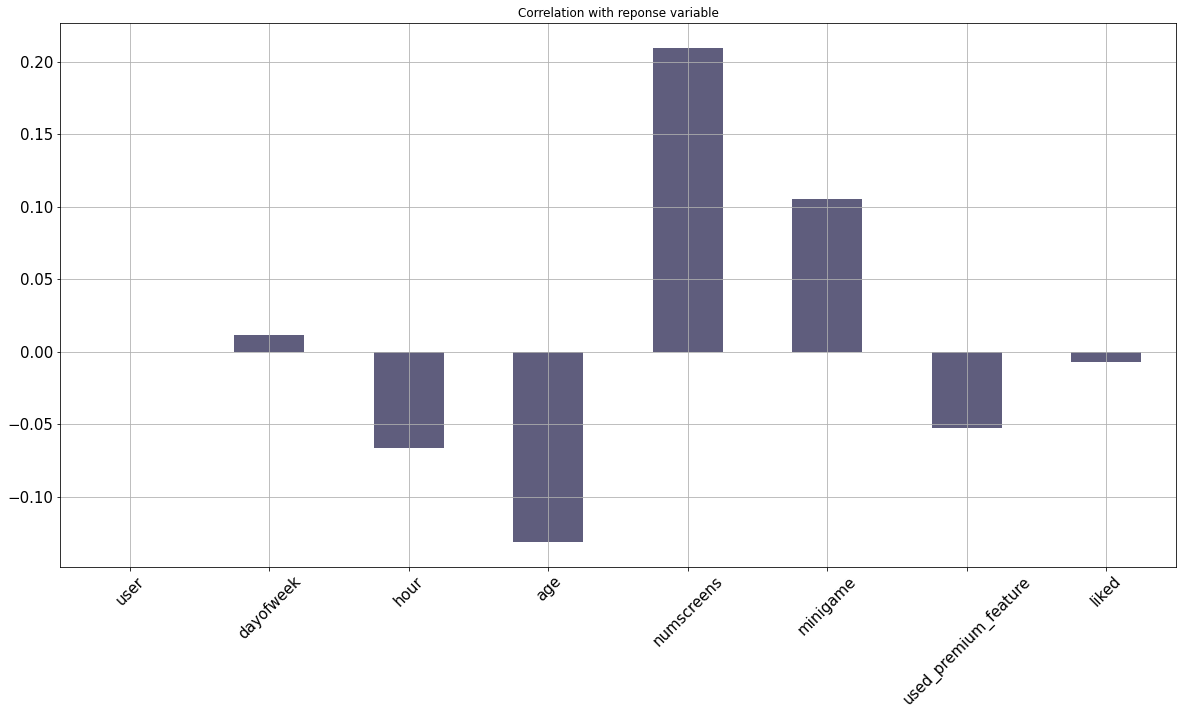

In [19]:
dataset.drop(columns='enrolled').corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                            title = 'Correlation with reponse variable',
                                            fontsize = 15, rot = 45, grid = True, color = '#5F5D7D')

## Correlation Matrix between all variables

<AxesSubplot:>

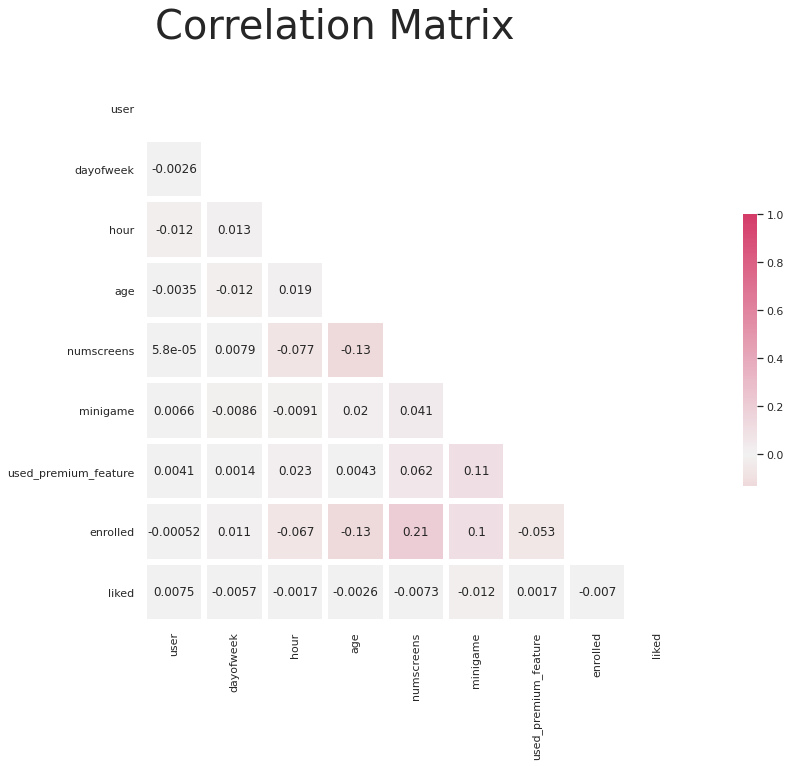

In [20]:
sns.set(style='white', font_scale= 1)
corr = dataset.corr() # here we compute the correlation between numericals variables
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype= np.bool) # To generate a numpy array from correlation with true or false
mask[np.triu_indices_from(mask)] = True # To have the index of the upper triangle
# Setup the matplotlib figures
f, ax = plt.subplots(figsize = (20,10))
f.suptitle('Correlation Matrix', fontsize=40)
# Generate a custum diverging color map
cmap = sns.diverging_palette(10, 0, as_cmap=True)
# Draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=5, cbar_kws={'shrink': .5})

# Feature engineering

Just here, we had see some information about the statistics for the dataset, but there are some variables which must be changed or transformed. For example, all variables that contains date and time must be transformed into numerical values. Furthermore, the screen column contains a set of screen accessed by each client, we consider these screens as variable and put it as columns.

In [21]:
dataset.dtypes
# The dates are objects, we need to change it. One reason is, we can calculate the difference between the first open and the enrolled date.
# This differece can be visualised in a distribution.

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

## Feature engineering to transform the date into delta time variables and change the response variable

The features first open and enrolled date are object variables, to build our model this kind of variable are not convenient.

In [22]:
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]] # parser transforms date object into delta time variable

In [23]:
dataset["first_open"]

0       2012-12-27 02:14:51.273
1       2012-12-02 01:16:00.905
2       2013-03-19 19:19:09.157
3       2013-07-05 16:08:46.354
4       2013-02-26 18:50:48.661
                  ...          
49995   2013-05-09 13:46:17.871
49996   2013-04-09 00:05:17.823
49997   2013-02-20 22:41:51.165
49998   2013-04-28 12:33:04.288
49999   2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: datetime64[ns]

In [24]:
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
# the if condition takes care about the NaN values

In [25]:
dataset["enrolled_date"]

0                           NaT
1                           NaT
2                           NaT
3       2013-07-05 16:11:49.513
4       2013-02-26 18:56:37.841
                  ...          
49995   2013-05-09 13:47:52.875
49996                       NaT
49997                       NaT
49998   2013-04-28 12:35:38.709
49999                       NaT
Name: enrolled_date, Length: 50000, dtype: datetime64[ns]

### Creating a delta time variable

This variable returns the time difference between the first access and the enrolled date. This variable corresponds just to the customer which had enroll. 

In [26]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')

In [27]:
dataset["difference"]

0        NaN
1        NaN
2        NaN
3        0.0
4        0.0
        ... 
49995    0.0
49996    NaN
49997    NaN
49998    0.0
49999    NaN
Name: difference, Length: 50000, dtype: float64

### Visualizing the distribution of delta time variable

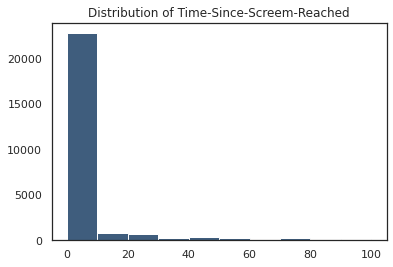

In [28]:
plt.figure()
plt.title('Distribution of Time-Since-Screem-Reached')
plt.hist(dataset['difference'].dropna(), color= '#3F5D7D', range = [0,100])
plt.show()

As we can see in the figure , the distribution does not show a great number of inscription between 20 and 100 hours of application usage. In this case, to make the model more clear, we are going to change the response, all customer which made the  subscription  after 24 hour will be turned into 0, it means, we do not consider them as a possible customer.

### Changing the response based on Distribution of Time-Since-Screem-Reached

In [29]:
dataset.loc[dataset.difference > 24, 'enrolled'] = 0

Now, one important thing is to eliminate certain columns in our dataset. Due to the change on the response variable, the features first_open, date_enrolled and difference do not have more sense, for this reason, we drop these columns.

In [30]:
dataset = dataset.drop(columns = ['difference', 'first_open', 'enrolled_date'])

## Feature engineering on the screem variables

The analysis of the screen (this is the service that the customer had visited) will be a very important step to build the model. Since we know which service each client had accessed, this information must be transformed into numerical values. The objective is to create a column to each the most visited screens and count how many times a client visited it.

Fortunately, we have the information about the most visited screen in a period of 24 hours from a second dataset. We are going to consider these screen to create a set of columns, the others screen which are not present in this list will be replaced into an other column called ‘other’.

### Creating the most visited screens columns

In [31]:
# Loading the second csv file
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [32]:
top_screens.shape # we have 58 top screens

(58,)

In [33]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [34]:
dataset['screen_list'] = dataset.screen_list.astype(str) +',' 
# We need to change the separator of screen_list column due to count of each screen that will be realized

In [35]:
# Putting the top_screens as columns and count the frequency to each customer
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int) # creating the columns to each top screen and counting the frequency to each client
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',','') # replacing the top screen by '' in the screen list column 

### Creating the column 'other'

Here we count all screens whice are not included in the top screen file.

In [36]:
dataset['Other'] = dataset.screen_list.str.count(',')

In [37]:
# Now, we do not more need the screen_list
dataset = dataset.drop(columns=['screen_list'])

### Funnels (Correleted Screens)

Some top screens are highly correlated due to have the same functionality, as Saving1 and the others Saving screen. So, to avoid this strong correlation we are going to transform all Saving variable into one. The same process will be realized to the variables Credit, Credit Card (CC) and Loan.

#### Saving Variables

In [38]:
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',] # The list with the saving screens

We sum to each customer the total number of screen saving and we put into one variable called TotalSaving.

In [39]:
dataset['TotalSaving'] = dataset[saving_screens].sum(axis = 1) 

In [40]:
# Eliminating the saving_screens columns
dataset = dataset.drop(columns=saving_screens)

#### Credit variable

In [41]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

#### Credit Card variable

In [42]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

#### Loan variable

In [43]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [ ]:
dataset.shape

Here, we finish the process of feature engineering. We expended the dataset, now it contains 50 columns against 12 at the beginning of the process.

# EDA for the expanded dataset

## Visualizing some dataset information

In [45]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,TotalSaving,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [46]:
dataset.iloc[: , 0: 15].describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.479840,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499598,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
dataset.iloc[: , 15: 30].describe()

,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0
mean,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0
std,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [48]:
dataset.iloc[: , 30: 45].describe()

,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker
count,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580
std,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733
min,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
dataset.iloc[: , 45: ].describe()

,Other,TotalSaving,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,6.214260,0.365020,0.92776,0.176860,0.788400
std,3.672561,1.405511,1.21751,0.612787,0.677462
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.000000,0.000000,0.00000,0.000000,0.000000
50%,6.000000,0.000000,0.00000,0.000000,1.000000
75%,8.000000,0.000000,1.00000,0.000000,1.000000
max,35.000000,10.000000,5.00000,3.000000,3.000000


In [50]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'TotalSaving', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

## Correlation among screen variables and the target

<AxesSubplot:title={'center':'Correlation with reponse variable'}>

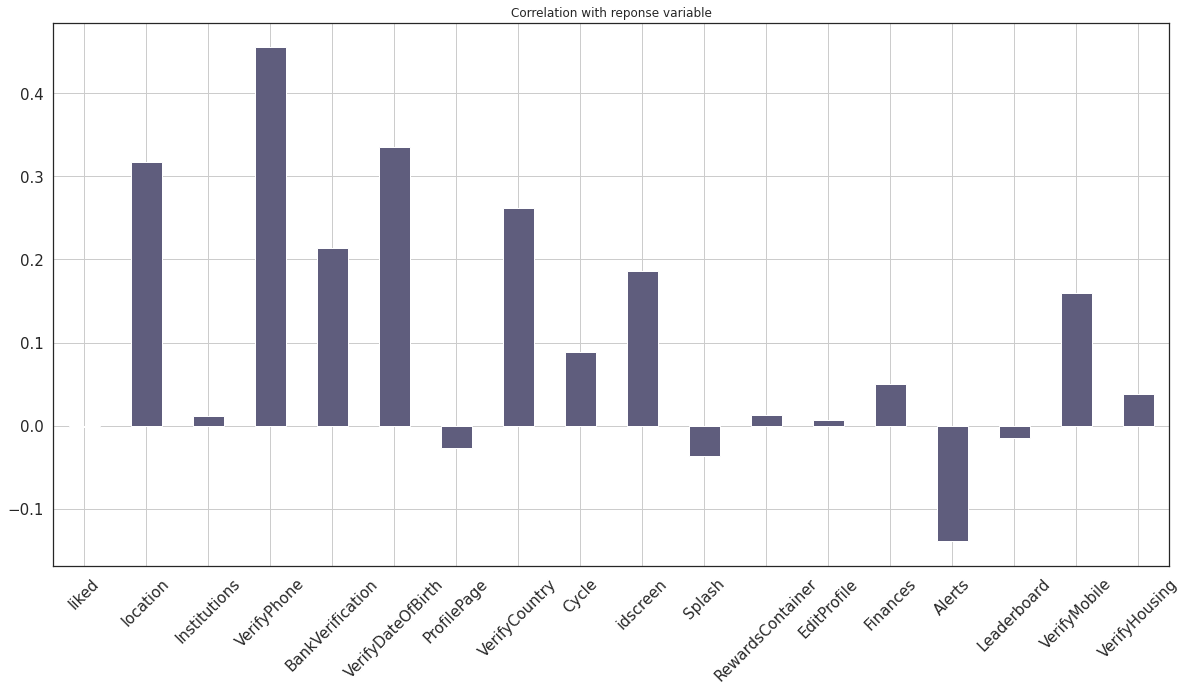

In [51]:
dataset.iloc[:, 8:26].corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                            title = 'Correlation with reponse variable',
                                            fontsize = 15, rot = 45, grid = True, color = '#5F5D7D')

<AxesSubplot:title={'center':'Correlation with reponse variable'}>

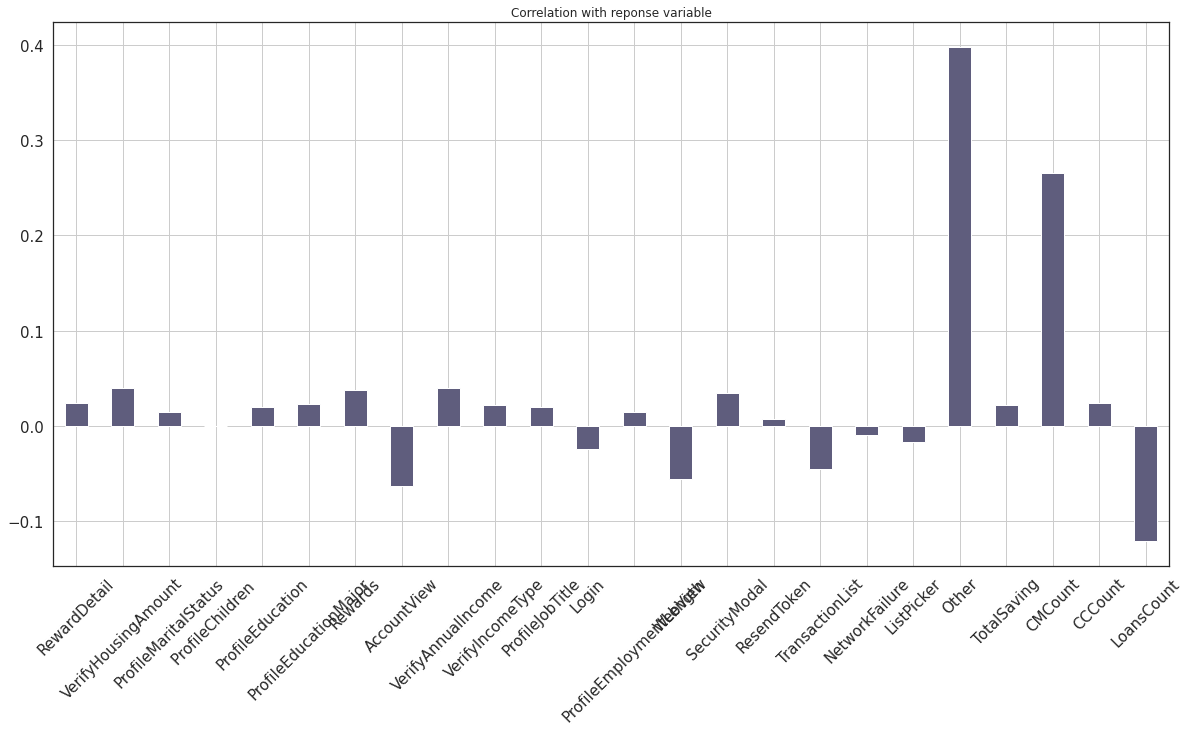

In [52]:
dataset.iloc[:, 26:].corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                            title = 'Correlation with reponse variable',
                                            fontsize = 15, rot = 45, grid = True, color = '#5F5D7D')

As we can from the above plot, the screens variables show a considerable correlation whit the target variable, it means that these variables are important to build a good model.

## Matrix correlation between all variables

<Figure size 432x288 with 0 Axes>

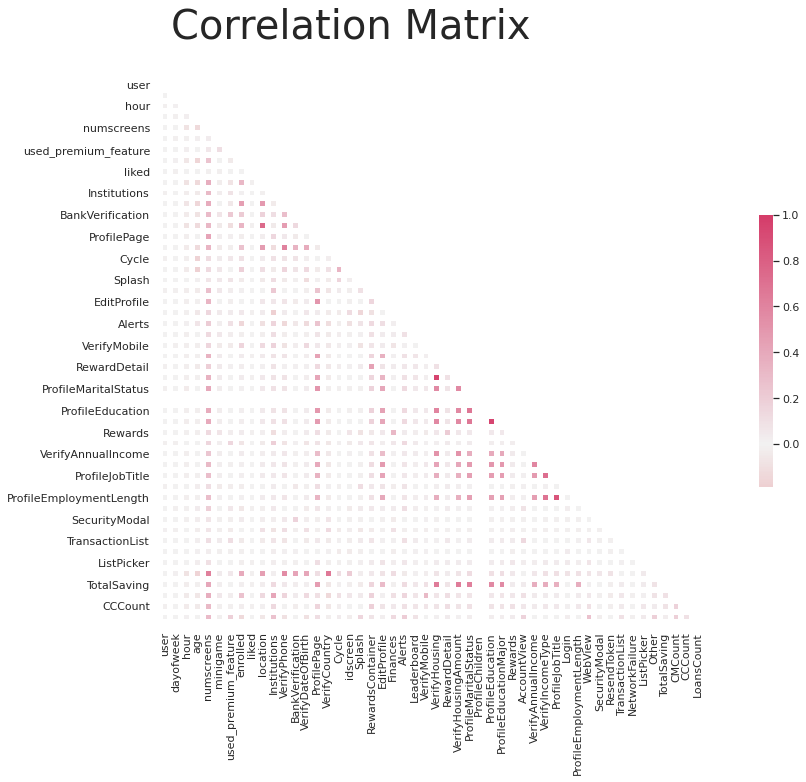

In [53]:
plt.figure()
sns.set(style='white', font_scale= 1)
corr = dataset.corr() # here we compute the correlation between numericals variables
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype= np.bool) # To generate a numpy array from correlation with true or false
mask[np.triu_indices_from(mask)] = True # To have the index of the upper triangle
# Setup the matplotlib figures
f, ax = plt.subplots(figsize = (20,10))
f.suptitle('Correlation Matrix', fontsize=40)
# Generate a custum diverging color map
cmap = sns.diverging_palette(10, 0, as_cmap=True)
# Draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask=mask, annot=False, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=5, cbar_kws={'shrink': .5})
plt.show()

## Matrix correlation between screen variables

<Figure size 432x288 with 0 Axes>

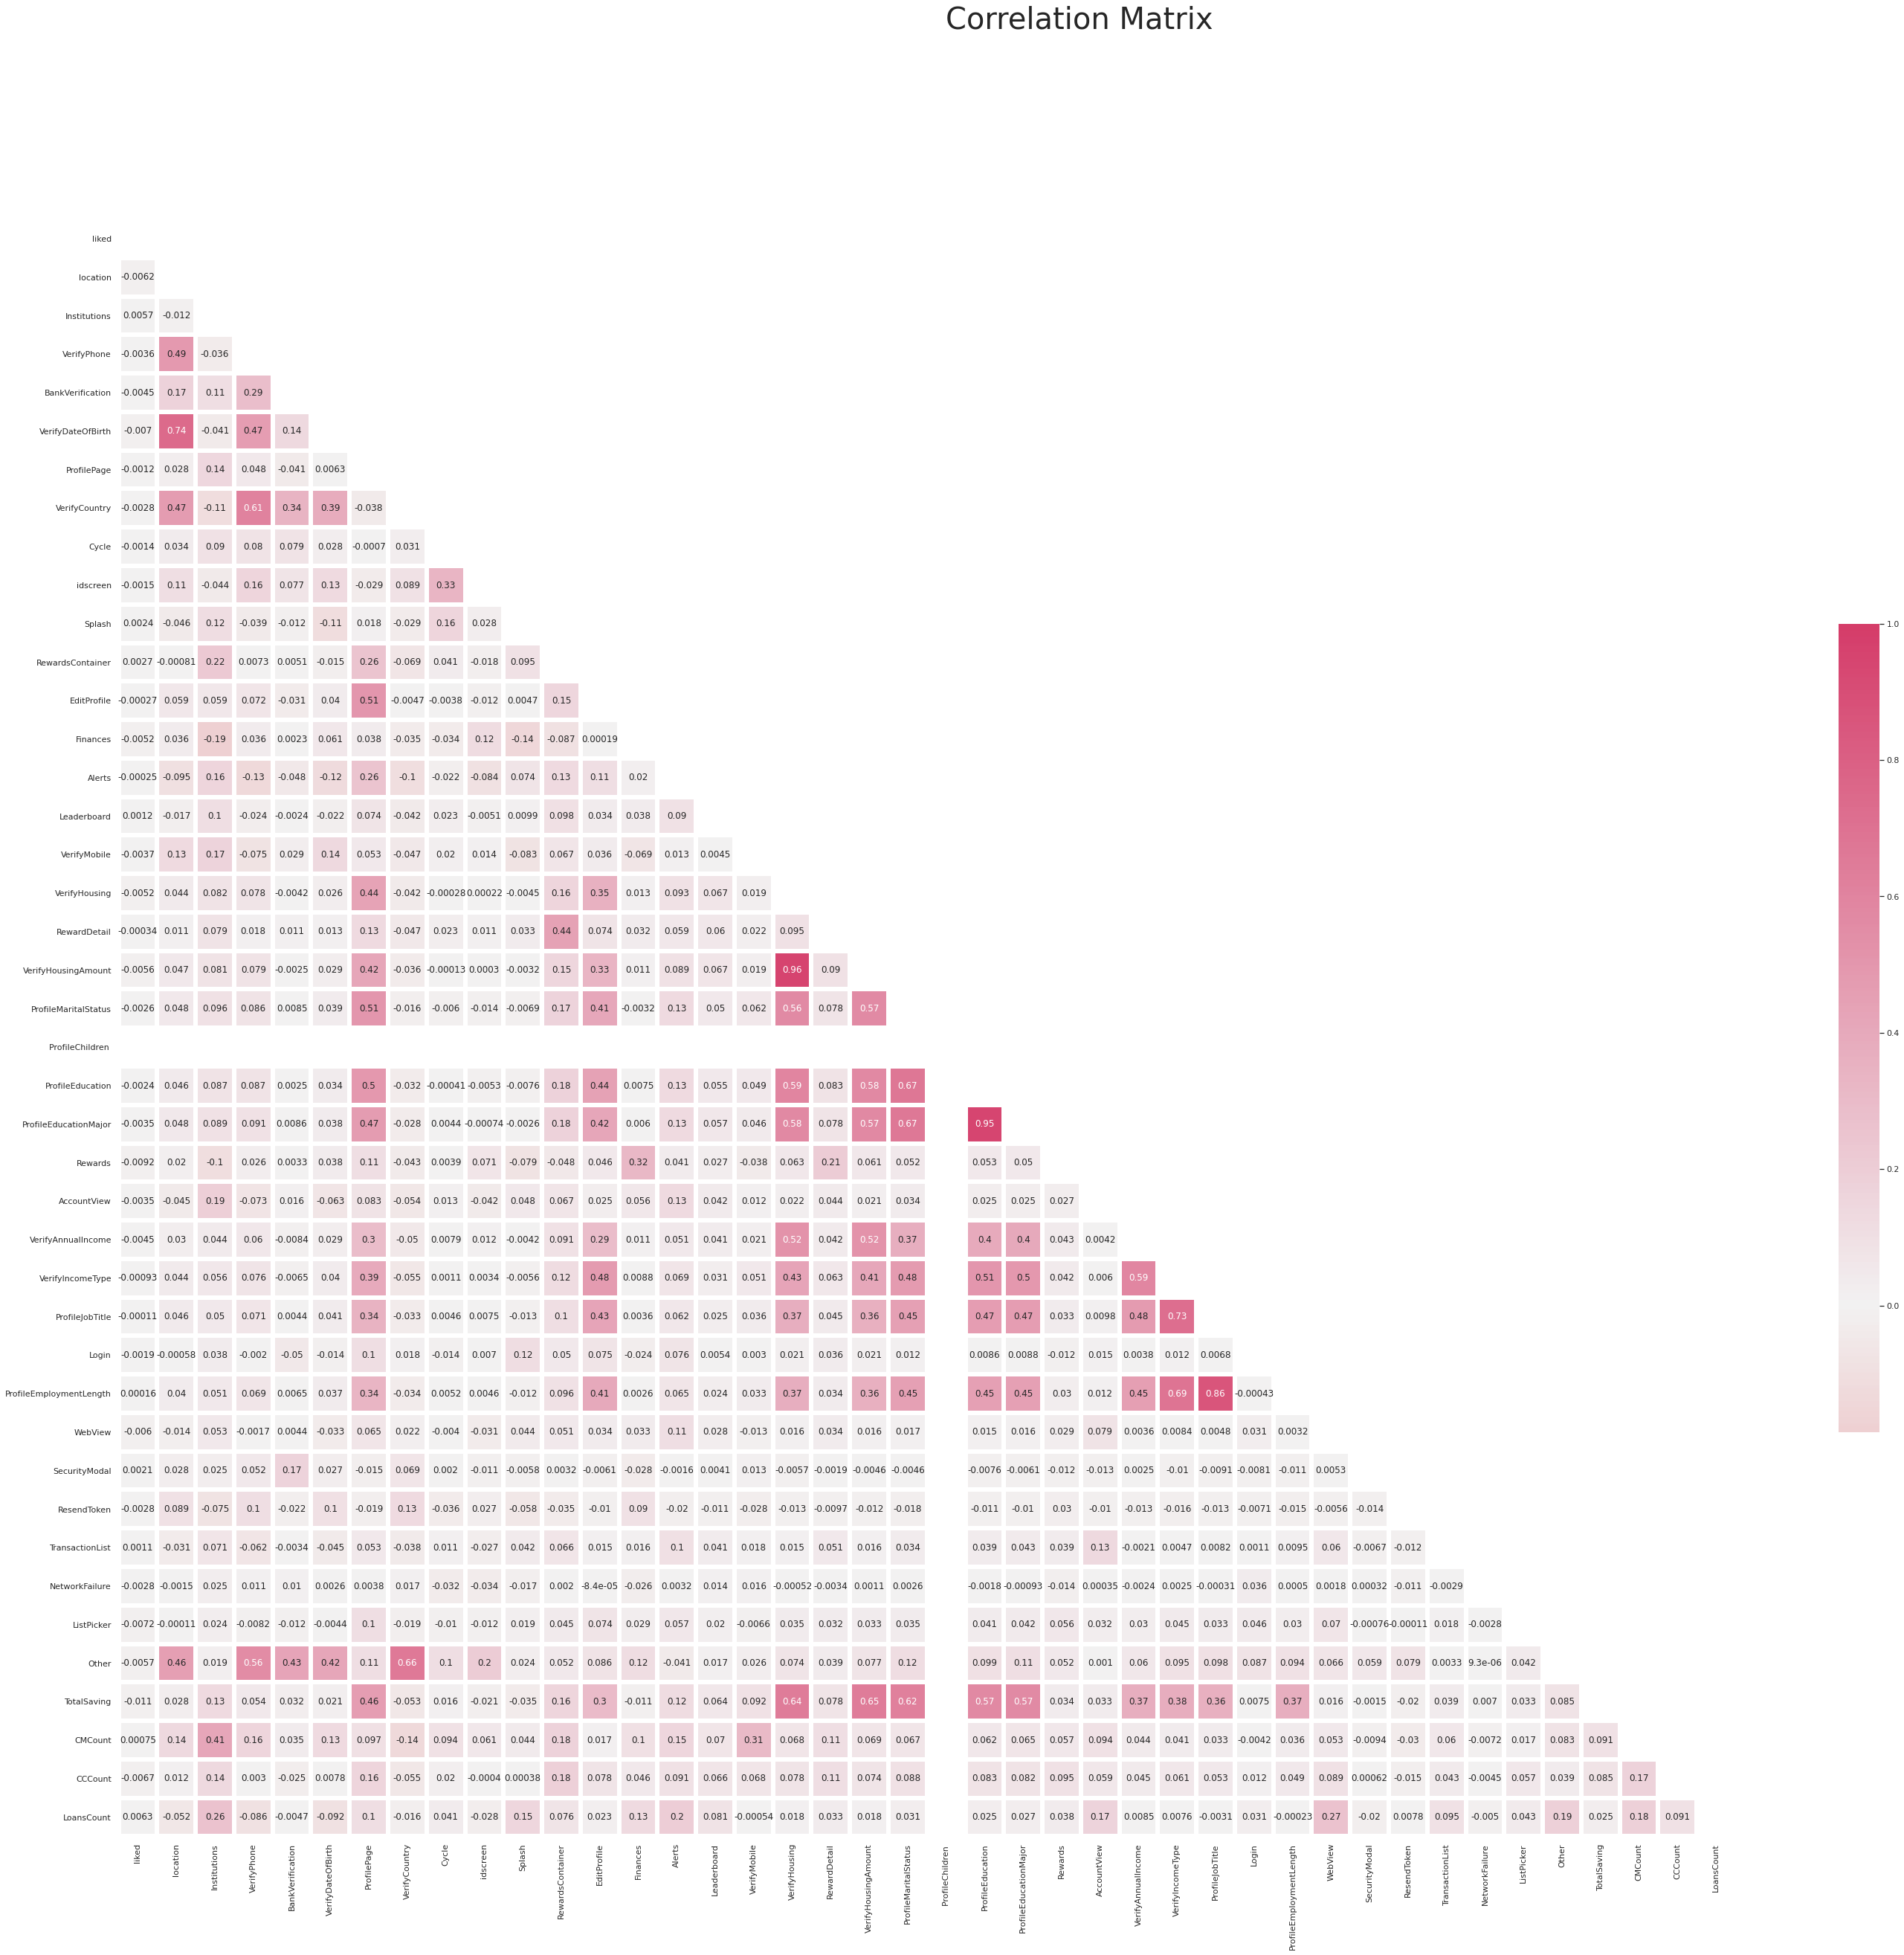

In [54]:
plt.figure()
sns.set(style='white', font_scale= 1)
corr = dataset.iloc[:, 8:].corr() # here we compute the correlation between numericals variables
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype= np.bool) # To generate a numpy array from correlation with true or false
mask[np.triu_indices_from(mask)] = True # To have the index of the upper triangle
# Setup the matplotlib figures
f, ax = plt.subplots(figsize = (50,40))
f.suptitle('Correlation Matrix', fontsize=40)
# Generate a custum diverging color map
cmap = sns.diverging_palette(10, 0, as_cmap=True)
# Draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=5, cbar_kws={'shrink': .5})
plt.show()

The most part of variables do not show a strong correlation, it’s good for the model. On the other hand some variables are highly correlated due to the similarity between them. For this problem we keep all these variables.

In [55]:
dataset.to_csv('new_appdata10.csv', index = False) # saving the extended dataset

# Building the classification models

## Data prepocessing

In [56]:
dataset = dataset.drop(columns='user')
# We need to separete the response column of the rest dataframe
response = dataset['enrolled']
# Eliminating the enrolled column from dataset_model
i_var = dataset.drop(columns='enrolled')

### Splitting the Dataset into Testing and Training variables

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(i_var, response, test_size = 0.2, random_state = 0)

### Feature scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_bckp = pd.DataFrame(sc.fit_transform(X_train))
X_test_bckp = pd.DataFrame(sc.transform(X_test))
X_train_bckp.columns = X_train.columns.values
X_test_bckp.columns = X_test.columns.values
X_train_bckp.idex = X_train.index.values
X_test_bckp.idex = X_test.index.values
X_train = X_train_bckp
X_test = X_test_bckp

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


## Training the models

In [59]:
# Logistic Regression

t0 = time.time()
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0, penalty='l2')
classifier1.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
# K Nearest Nieghbors

t0 = time.time()
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p = 2)
classifier2.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

# Support Vector Machine - Linear Classifier

#t0 = time.time()
#from sklearn.svm import SVC
#classifier3 = SVC(kernel= 'linear', random_state=0)
#classifier3.fit(X_train, y_train)
#t1 = time.time()
#print("Took %0.2f seconds" % (t1 - t0))

# Kernel Support Vector Machine

#t0 = time.time()
#from sklearn.svm import SVC
#classifier4 = SVC(kernel='rbf', random_state=0)
#classifier4.fit(X_train, y_train)
#t1 = time.time()
#print("Took %0.2f seconds" % (t1 - t0))

# Naïves Bayes Classification
t0 = time.time()
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

# Decision Tree Classification
t0 = time.time()
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier6.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

# Random Forest Classification
t0 = time.time()
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
classifier7.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 0.34 seconds
Took 1.82 seconds
Took 0.03 seconds
Took 0.30 seconds
Took 4.59 seconds


### Predicting the test result

In [60]:
## Predicting the test result
t0 = time.time()
y_pred1 = classifier1.predict(X_test)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

t0 = time.time()
y_pred2 = classifier2.predict(X_test)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

#y_pred3 = classifier3.predict(X_test)
#y_pred4 = classifier4.predict(X_test)
t0 = time.time()
y_pred5 = classifier5.predict(X_test)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

t0 = time.time()
y_pred6 = classifier6.predict(X_test)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

t0 = time.time()
y_pred7 = classifier7.predict(X_test)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 0.01 seconds
Took 48.34 seconds
Took 0.01 seconds
Took 0.00 seconds
Took 0.26 seconds


## Selection Model

To select the best classification model, we consider some metrics as precision, recall, f1-score and accuracy. To verify with more precision, to each model we employ the cross validation. After the cross validation, we are going to choose the two best model to tune.

### Metrics results without cross validation

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
#cm3 = confusion_matrix(y_test, y_pred3)
#cm4 = confusion_matrix(y_test, y_pred4)
cm5 = confusion_matrix(y_test, y_pred5)
cm6 = confusion_matrix(y_test, y_pred6)
cm7 = confusion_matrix(y_test, y_pred7)

print('Checking Confusion Matrix to a single observation')
print('Logistic Regression Classification')
print(cm1)
print(classification_report(y_test,y_pred1))
print('\n')
print('K Nearest Neighbors')
print(cm2)
print(classification_report(y_test,y_pred2))
print('\n')
print('Support Vector Machine - Not selected')
#print(cm3)
#print(classification_report(y_test,y_pred3))
print('\n')
print('Kernel Support Vector Machine - Not selected')
#print(cm4)
#print(classification_report(y_test,y_pred4))
print('\n')
print('Naive Bayes Classification')
print(cm5)
print(classification_report(y_test,y_pred5))
print('\n')
print('Decision Tree Classification')
print(cm6)
print(classification_report(y_test,y_pred6))
print('\n')
print('Random Forest Classification')
print(cm7)
print(classification_report(y_test,y_pred7))
print('\n')

Checking Confusion Matrix to a single observation
Logistic Regression Classification
[[4135 1124]
 [1055 3686]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      5259
           1       0.77      0.78      0.77      4741

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



K Nearest Neighbors
[[3957 1302]
 [1270 3471]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      5259
           1       0.73      0.73      0.73      4741

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



Support Vector Machine - Not selected


Kernel Support Vector Machine - Not selected


Naive Bayes Classification
[[3931 1328]
 [1465 3276]]
              precision    recall  f1-scor

### Metrics results with cross validation

In [62]:
scoring = ['accuracy', 'precision', 'recall', 'f1'] # List of scores
from sklearn.model_selection import cross_validate
accuracies1 = cross_validate(estimator = classifier1, X = X_train, y = y_train, cv = 10, scoring = scoring)
#accuracies2 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
#accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
#accuracies4 = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
accuracies5 = cross_validate(estimator = classifier5, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies6 = cross_validate(estimator = classifier6, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies7 = cross_validate(estimator = classifier7, X = X_train, y = y_train, cv = 10, scoring = scoring)


print('Checking K-Fold Cross Validation')
print('\n')
print('Logistic Regression Classification')
print("Accuracy: {:.2f} %".format(accuracies1['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies1['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies1['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies1['test_f1'].mean()*100))
print('\n')

print('Naive Bayes Classification')
print("Accuracy: {:.2f} %".format(accuracies5['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies5['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies5['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies5['test_f1'].mean()*100))
print('\n')
print('Decision Tree Classification')
print("Accuracy: {:.2f} %".format(accuracies6['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies6['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies6['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies6['test_f1'].mean()*100))
print('\n')
print('Random Forest Classification')
print("Accuracy: {:.2f} %".format(accuracies7['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies7['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies7['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies7['test_f1'].mean()*100))
print('\n')

Checking K-Fold Cross Validation


Logistic Regression Classification
Accuracy: 77.53 %
Precision: 76.48 %
Recall: 77.00 %
F1-score: 76.74 %


Naive Bayes Classification
Accuracy: 71.95 %
Precision: 71.63 %
Recall: 69.10 %
F1-score: 70.33 %


Decision Tree Classification
Accuracy: 70.53 %
Precision: 69.23 %
Recall: 69.78 %
F1-score: 69.50 %


Random Forest Classification
Accuracy: 78.95 %
Precision: 79.16 %
Recall: 76.40 %
F1-score: 77.75 %




## Boosting the model


### Setting the parameters

In [63]:
param_grid1 = {'C' : [0.001, 0.01, 0.1, 1 , 10, 100], 'solver' : ['newton-cg', 'sag', 'saga','lbfgs', 'liblinear' ], 'penalty' : ['l1', 'l2']}
param_grid2 = {'criterion': ['gini', 'entropy'], 'n_estimators': [10, 50, 100, 500, 1000]}

### Searching the best parameters and training the models

In [64]:
metrics = {'ACC' : 'accuracy', 'PC' : 'precision', 'REC' : 'recall', 'F1' : 'f1'}

from sklearn.model_selection import GridSearchCV

grid1 = GridSearchCV(classifier1, param_grid1, cv = 10, scoring = metrics, refit = 'ACC', verbose = 4)
grid2 = GridSearchCV(classifier7, param_grid2, cv = 10, scoring = metrics, refit = 'ACC', verbose = 4)

class_boost_1 = grid1.fit(X_train,y_train)
class_boost_2 = grid2.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, A

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:

[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.769, F1=0.768, PC=0.744, REC=0.793, total=   0.5s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.760, F1=0.758, PC=0.736, REC=0.781, total=   0.5s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.774, F1=0.771, PC=0.752, REC=0.791, total=   0.5s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.768, F1=0.772, PC=0.733, REC=0.816, total=   0.5s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.756, F1=0.756, PC=0.729, REC=0.785, total=   0.5s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.763, F1=0.761, PC=0.740, REC=0.783, total=   0.5s
[CV] C=0.001, penalty=l1, solver=saga ...............................

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)



[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.758, F1=0.761, PC=0.726, REC=0.799, total=   0.1s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.770, F1=0.771, PC=0.741, REC=0.804, total=   0.1s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.762, F1=0.770, PC=0.720, REC=0.827, total=   0.2s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.755, F1=0.759, PC=0.721, REC=0.801, total=   0.1s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.760, F1=0.762, PC=0.729, REC=0.798, total=   0.2s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.762, F1=0.767, PC=0.724, REC=0.816, total=   0.1s
[CV] C=0.001, penalty=l1, solver=libli

[CV]  C=0.001, penalty=l2, solver=liblinear, ACC=0.775, F1=0.768, PC=0.761, REC=0.775, total=   0.4s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, ACC=0.771, F1=0.764, PC=0.758, REC=0.771, total=   0.3s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, ACC=0.782, F1=0.774, PC=0.772, REC=0.777, total=   0.3s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, ACC=0.775, F1=0.774, PC=0.750, REC=0.799, total=   0.3s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, ACC=0.769, F1=0.765, PC=0.749, REC=0.782, total=   0.4s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, ACC=0.775, F1=0.768, PC=0.761, REC=0.775, total=   0.3s
[CV] C=0.001, penalty=l2, solver=liblin

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The

[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.779, F1=0.770, PC=0.772, REC=0.769, total=   0.5s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.775, F1=0.767, PC=0.764, REC=0.770, total=   0.5s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.784, F1=0.776, PC=0.776, REC=0.776, total=   0.5s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.776, F1=0.773, PC=0.755, REC=0.792, total=   0.5s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.772, F1=0.765, PC=0.758, REC=0.773, total=   0.5s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.774, F1=0.766, PC=0.762, REC=0.771, total=   0.5s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.779, F1=0.771, PC=0.770, REC=0.771, total=   0.3s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.776, F1=0.768, PC=0.764, REC=0.772, total=   0.2s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.783, F1=0.776, PC=0.774, REC=0.777, total=   0.3s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.776, F1=0.774, PC=0.754, REC=0.795, total=   0.3s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.773, F1=0.767, PC=0.758, REC=0.777, total=   0.3s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.774, F1=0.767, PC=0.761, REC=0.774, total=   0.2s
[CV] C=0.01, penalty=l1, solver=liblinear ...

[CV]  C=0.01, penalty=l2, solver=lbfgs, ACC=0.763, F1=0.756, PC=0.750, REC=0.762, total=   0.3s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, ACC=0.780, F1=0.771, PC=0.773, REC=0.769, total=   0.4s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, ACC=0.778, F1=0.770, PC=0.771, REC=0.768, total=   0.4s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, ACC=0.786, F1=0.776, PC=0.780, REC=0.772, total=   0.4s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, ACC=0.774, F1=0.770, PC=0.756, REC=0.784, total=   0.4s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, ACC=0.771, F1=0.764, PC=0.758, REC=0.769, total=   0.4s
[CV] C=0.01, penalty=l2, solver=liblinear .......

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The

[CV]  C=0.1, penalty=l1, solver=saga, ACC=0.780, F1=0.771, PC=0.774, REC=0.768, total=   0.5s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.1, penalty=l1, solver=saga, ACC=0.778, F1=0.769, PC=0.770, REC=0.767, total=   0.5s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.1, penalty=l1, solver=saga, ACC=0.786, F1=0.777, PC=0.782, REC=0.771, total=   0.5s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.1, penalty=l1, solver=saga, ACC=0.776, F1=0.771, PC=0.758, REC=0.785, total=   0.5s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.1, penalty=l1, solver=saga, ACC=0.770, F1=0.763, PC=0.758, REC=0.768, total=   0.5s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.1, penalty=l1, solver=saga, ACC=0.775, F1=0.767, PC=0.766, REC=0.768, total=   0.5s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, penalty=l1, solver=liblinear, ACC=0.780, F1=0.771, PC=0.773, REC=0.768, total=   0.4s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV]  C=0.1, penalty=l1, solver=liblinear, ACC=0.778, F1=0.769, PC=0.770, REC=0.767, total=   0.4s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV]  C=0.1, penalty=l1, solver=liblinear, ACC=0.787, F1=0.777, PC=0.782, REC=0.772, total=   0.4s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV]  C=0.1, penalty=l1, solver=liblinear, ACC=0.776, F1=0.771, PC=0.758, REC=0.785, total=   0.4s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV]  C=0.1, penalty=l1, solver=liblinear, ACC=0.770, F1=0.763, PC=0.758, REC=0.768, total=   0.3s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV]  C=0.1, penalty=l1, solver=liblinear, ACC=0.775, F1=0.767, PC=0.766, REC=0.768, total=   0.3s
[CV] C=0.1, penalty=l1, solver=liblinear ..........

[CV]  C=0.1, penalty=l2, solver=liblinear, ACC=0.780, F1=0.770, PC=0.773, REC=0.767, total=   0.4s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, ACC=0.777, F1=0.768, PC=0.770, REC=0.767, total=   0.4s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, ACC=0.787, F1=0.777, PC=0.783, REC=0.771, total=   0.4s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, ACC=0.775, F1=0.770, PC=0.757, REC=0.784, total=   0.5s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, ACC=0.770, F1=0.763, PC=0.758, REC=0.768, total=   0.4s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, ACC=0.777, F1=0.768, PC=0.768, REC=0.768, total=   0.4s
[CV] C=0.1, penalty=l2, solver=liblinear ..........

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The

[CV]  C=1, penalty=l1, solver=saga, ACC=0.779, F1=0.770, PC=0.773, REC=0.767, total=   0.6s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV]  C=1, penalty=l1, solver=saga, ACC=0.777, F1=0.768, PC=0.770, REC=0.767, total=   0.5s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV]  C=1, penalty=l1, solver=saga, ACC=0.787, F1=0.777, PC=0.784, REC=0.771, total=   0.5s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV]  C=1, penalty=l1, solver=saga, ACC=0.775, F1=0.770, PC=0.757, REC=0.784, total=   0.6s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV]  C=1, penalty=l1, solver=saga, ACC=0.770, F1=0.763, PC=0.758, REC=0.768, total=   0.5s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV]  C=1, penalty=l1, solver=saga, ACC=0.777, F1=0.768, PC=0.768, REC=0.769, total=   0.5s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV]  C=1, penalty=l1,

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, penalty=l1, solver=liblinear, ACC=0.779, F1=0.770, PC=0.773, REC=0.767, total=   0.4s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV]  C=1, penalty=l1, solver=liblinear, ACC=0.777, F1=0.768, PC=0.770, REC=0.767, total=   0.4s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV]  C=1, penalty=l1, solver=liblinear, ACC=0.787, F1=0.777, PC=0.784, REC=0.771, total=   0.4s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV]  C=1, penalty=l1, solver=liblinear, ACC=0.775, F1=0.770, PC=0.757, REC=0.784, total=   0.4s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV]  C=1, penalty=l1, solver=liblinear, ACC=0.770, F1=0.763, PC=0.758, REC=0.768, total=   0.5s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV]  C=1, penalty=l1, solver=liblinear, ACC=0.777, F1=0.768, PC=0.768, REC=0.769, total=   0.4s
[CV] C=1, penalty=l1, solver=liblinear ........................

[CV]  C=1, penalty=l2, solver=liblinear, ACC=0.779, F1=0.770, PC=0.773, REC=0.767, total=   0.4s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV]  C=1, penalty=l2, solver=liblinear, ACC=0.777, F1=0.768, PC=0.770, REC=0.767, total=   0.4s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV]  C=1, penalty=l2, solver=liblinear, ACC=0.787, F1=0.777, PC=0.784, REC=0.770, total=   0.4s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV]  C=1, penalty=l2, solver=liblinear, ACC=0.775, F1=0.770, PC=0.757, REC=0.784, total=   0.4s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV]  C=1, penalty=l2, solver=liblinear, ACC=0.770, F1=0.762, PC=0.758, REC=0.767, total=   0.5s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV]  C=1, penalty=l2, solver=liblinear, ACC=0.776, F1=0.768, PC=0.767, REC=0.769, total=   0.5s
[CV] C=1, penalty=l2, solver=liblinear ........................

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The

[CV]  C=10, penalty=l1, solver=saga, ACC=0.779, F1=0.770, PC=0.773, REC=0.767, total=   0.6s
[CV] C=10, penalty=l1, solver=saga ...................................
[CV]  C=10, penalty=l1, solver=saga, ACC=0.778, F1=0.769, PC=0.770, REC=0.767, total=   0.6s
[CV] C=10, penalty=l1, solver=saga ...................................
[CV]  C=10, penalty=l1, solver=saga, ACC=0.787, F1=0.777, PC=0.784, REC=0.770, total=   0.5s
[CV] C=10, penalty=l1, solver=saga ...................................
[CV]  C=10, penalty=l1, solver=saga, ACC=0.775, F1=0.770, PC=0.757, REC=0.784, total=   0.5s
[CV] C=10, penalty=l1, solver=saga ...................................
[CV]  C=10, penalty=l1, solver=saga, ACC=0.770, F1=0.762, PC=0.758, REC=0.767, total=   0.5s
[CV] C=10, penalty=l1, solver=saga ...................................
[CV]  C=10, penalty=l1, solver=saga, ACC=0.776, F1=0.768, PC=0.767, REC=0.769, total=   0.5s
[CV] C=10, penalty=l1, solver=saga ...................................
[CV]  C=10, pena

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, penalty=l1, solver=liblinear, ACC=0.779, F1=0.770, PC=0.773, REC=0.767, total=   0.4s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV]  C=10, penalty=l1, solver=liblinear, ACC=0.778, F1=0.769, PC=0.770, REC=0.767, total=   0.4s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV]  C=10, penalty=l1, solver=liblinear, ACC=0.787, F1=0.777, PC=0.784, REC=0.770, total=   0.5s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV]  C=10, penalty=l1, solver=liblinear, ACC=0.775, F1=0.770, PC=0.757, REC=0.784, total=   0.4s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV]  C=10, penalty=l1, solver=liblinear, ACC=0.770, F1=0.762, PC=0.758, REC=0.767, total=   0.4s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV]  C=10, penalty=l1, solver=liblinear, ACC=0.776, F1=0.768, PC=0.767, REC=0.769, total=   0.4s
[CV] C=10, penalty=l1, solver=liblinear .................

[CV]  C=10, penalty=l2, solver=liblinear, ACC=0.779, F1=0.770, PC=0.773, REC=0.767, total=   0.4s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV]  C=10, penalty=l2, solver=liblinear, ACC=0.778, F1=0.769, PC=0.770, REC=0.767, total=   0.4s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV]  C=10, penalty=l2, solver=liblinear, ACC=0.787, F1=0.777, PC=0.784, REC=0.770, total=   0.4s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV]  C=10, penalty=l2, solver=liblinear, ACC=0.775, F1=0.770, PC=0.757, REC=0.784, total=   0.4s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV]  C=10, penalty=l2, solver=liblinear, ACC=0.770, F1=0.762, PC=0.758, REC=0.767, total=   0.4s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV]  C=10, penalty=l2, solver=liblinear, ACC=0.776, F1=0.768, PC=0.767, REC=0.769, total=   0.4s
[CV] C=10, penalty=l2, solver=liblinear .................

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The

[CV]  C=100, penalty=l1, solver=saga, ACC=0.779, F1=0.770, PC=0.773, REC=0.767, total=   0.5s
[CV] C=100, penalty=l1, solver=saga ..................................
[CV]  C=100, penalty=l1, solver=saga, ACC=0.778, F1=0.769, PC=0.770, REC=0.767, total=   0.5s
[CV] C=100, penalty=l1, solver=saga ..................................
[CV]  C=100, penalty=l1, solver=saga, ACC=0.787, F1=0.777, PC=0.784, REC=0.770, total=   0.5s
[CV] C=100, penalty=l1, solver=saga ..................................
[CV]  C=100, penalty=l1, solver=saga, ACC=0.775, F1=0.770, PC=0.757, REC=0.784, total=   0.6s
[CV] C=100, penalty=l1, solver=saga ..................................
[CV]  C=100, penalty=l1, solver=saga, ACC=0.770, F1=0.762, PC=0.758, REC=0.767, total=   0.5s
[CV] C=100, penalty=l1, solver=saga ..................................
[CV]  C=100, penalty=l1, solver=saga, ACC=0.776, F1=0.768, PC=0.767, REC=0.769, total=   0.5s
[CV] C=100, penalty=l1, solver=saga ..................................
[CV]  C=10

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=100, penalty=l1, solver=liblinear, ACC=0.779, F1=0.770, PC=0.773, REC=0.767, total=   0.4s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV]  C=100, penalty=l1, solver=liblinear, ACC=0.778, F1=0.769, PC=0.770, REC=0.767, total=   0.4s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV]  C=100, penalty=l1, solver=liblinear, ACC=0.787, F1=0.777, PC=0.784, REC=0.770, total=   0.4s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV]  C=100, penalty=l1, solver=liblinear, ACC=0.775, F1=0.770, PC=0.757, REC=0.784, total=   0.4s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV]  C=100, penalty=l1, solver=liblinear, ACC=0.770, F1=0.762, PC=0.758, REC=0.767, total=   0.4s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV]  C=100, penalty=l1, solver=liblinear, ACC=0.776, F1=0.768, PC=0.767, REC=0.769, total=   0.4s
[CV] C=100, penalty=l1, solver=liblinear ..........

[CV]  C=100, penalty=l2, solver=liblinear, ACC=0.779, F1=0.770, PC=0.773, REC=0.767, total=   0.5s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, ACC=0.778, F1=0.769, PC=0.770, REC=0.767, total=   0.6s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, ACC=0.787, F1=0.777, PC=0.784, REC=0.770, total=   0.4s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, ACC=0.775, F1=0.770, PC=0.757, REC=0.784, total=   0.5s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, ACC=0.770, F1=0.762, PC=0.758, REC=0.767, total=   0.5s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, ACC=0.776, F1=0.768, PC=0.767, REC=0.769, total=   0.5s
[CV] C=100, penalty=l2, solver=liblinear ..........

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.4min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, n_estimators=10, ACC=0.777, F1=0.756, PC=0.799, REC=0.716, total=   0.4s
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=gini, n_estimators=10, ACC=0.755, F1=0.734, PC=0.771, REC=0.700, total=   0.4s
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  criterion=gini, n_estimators=10, ACC=0.777, F1=0.756, PC=0.799, REC=0.716, total=   0.4s
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV]  criterion=gini, n_estimators=10, ACC=0.767, F1=0.750, PC=0.776, REC=0.726, total=   0.4s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.763, F1=0.744, PC=0.775, REC=0.716, total=   0.4s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.774, F1=0.753, PC=0.795, REC=0.716, total=   0.4s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.769, F1=0.750, PC=0.783, REC=0.720, total=   0.4s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.772, F1=0.751, PC=0.791, REC=0.716, total=   0.4s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.769, F1=0.753, PC=0.778, REC=0.728, total=   0.4s
[CV] criterion=gini, n_estimators=10 .................................
[CV]

[CV]  criterion=entropy, n_estimators=10, ACC=0.772, F1=0.754, PC=0.785, REC=0.725, total=   0.5s
[CV] criterion=entropy, n_estimators=10 ..............................
[CV]  criterion=entropy, n_estimators=10, ACC=0.768, F1=0.749, PC=0.784, REC=0.716, total=   0.4s
[CV] criterion=entropy, n_estimators=10 ..............................
[CV]  criterion=entropy, n_estimators=10, ACC=0.770, F1=0.749, PC=0.791, REC=0.711, total=   0.4s
[CV] criterion=entropy, n_estimators=10 ..............................
[CV]  criterion=entropy, n_estimators=10, ACC=0.772, F1=0.754, PC=0.783, REC=0.728, total=   0.4s
[CV] criterion=entropy, n_estimators=10 ..............................
[CV]  criterion=entropy, n_estimators=10, ACC=0.762, F1=0.741, PC=0.780, REC=0.705, total=   0.4s
[CV] criterion=entropy, n_estimators=10 ..............................
[CV]  criterion=entropy, n_estimators=10, ACC=0.787, F1=0.771, PC=0.797, REC=0.746, total=   0.4s
[CV] criterion=entropy, n_estimators=10 .................

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 21.5min finished


### Predicting with the best parameters

In [65]:
boost_predictions1 = class_boost_1.predict(X_test)
boost_predictions2 = class_boost_2.predict(X_test)

### Metrics scores and the best parameters

#### Logistic Regression Boosted

Logistic Regression Classification - Boosted


Best Parameters
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix


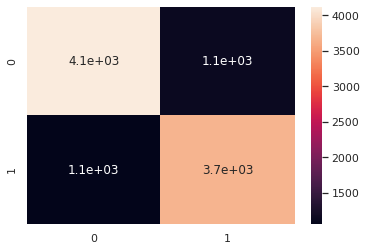

Metrics Results
- Accuracy: 77.56 %
- Precision: 76.43 %
- Recall: 77.20 %
- F1-score: 76.81 %




In [70]:
print('Logistic Regression Classification - Boosted')
print('\n')
print('Best Parameters')
print(grid1.best_params_)
print('Confusion Matrix')
cmb1 = confusion_matrix(y_test, boost_predictions1)
plt.plot()
sns.heatmap(cmb1, annot=True)
plt.show()
print('Metrics Results')
print("- Accuracy: {:.2f} %".format(grid1.cv_results_['mean_test_ACC'][grid1.best_index_].mean()*100))
print("- Precision: {:.2f} %".format(grid1.cv_results_['mean_test_PC'][grid1.best_index_].mean()*100))
print("- Recall: {:.2f} %".format(grid1.cv_results_['mean_test_REC'][grid1.best_index_].mean()*100))
print("- F1-score: {:.2f} %".format(grid1.cv_results_['mean_test_F1'][grid1.best_index_].mean()*100))
print('\n')

#### Random Forest Boosted

Random Forest - Boosted


Best Parameters
{'criterion': 'gini', 'n_estimators': 1000}
Confusion Matrix


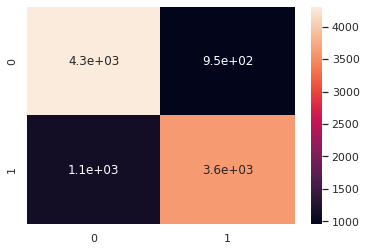

Metrics Results
- Accuracy: 79.10 %
- Precision: 79.25 %
- Recall: 76.65 %
- F1-score: 77.92 %




In [69]:
print('Random Forest - Boosted')
print('\n')
print('Best Parameters')
print(grid2.best_params_)
print('Confusion Matrix')
cmb2 = confusion_matrix(y_test, boost_predictions2)
plt.plot()
sns.heatmap(cmb2, annot=True)
plt.show()
print('Metrics Results')
print("- Accuracy: {:.2f} %".format(grid2.cv_results_['mean_test_ACC'][grid2.best_index_].mean()*100))
print("- Precision: {:.2f} %".format(grid2.cv_results_['mean_test_PC'][grid2.best_index_].mean()*100))
print("- Recall: {:.2f} %".format(grid2.cv_results_['mean_test_REC'][grid2.best_index_].mean()*100))
print("- F1-score: {:.2f} %".format(grid2.cv_results_['mean_test_F1'][grid2.best_index_].mean()*100))
print('\n')

# Conclusions
In this notebook we had build a classification model to predict two possibles class of  customers, they that will enroll to a premium version of an application and they that will not enroll. After the EDA process and the feature engineering for the original dataset, we built a expanded dataset with more information. The results are  satisfactory, with good metrics scores. For this problem, we have two model that was tuned and give good responses. According with accuracy metric, the best classification model is the Random Forest,  $accuracy = 79.10 \%$. On the other hand, we have the Logistic Regression which has a satisfactory accuracy  $77.56 \%$. 

In general, we were able to create good models to predict a class of customers. We also were able to understand the nature of the problem by the EDA, fact that aided to build an accurate model. the results are closer to the reality of the problem.